In [1]:
import os, sys
import pandas as pd
from pycaret.regression import *
sys.path.append(r"C:\work\water_use\CAWSC_WaterUse\WUtrainer")
#from featurize import MultiOneHotEncoder
target = 'wu_rate'

# Load Dataset
## x

In [2]:
dataset = pd.read_csv(r"C:\work\water_use\ml_experiments\annual_v_0_0\clean_train_db.csv")


In [3]:
# categorical transformation
categorical_features = ['HUC2', 'state_id',  'KG_climate_zone' ]
#ohc1 = MultiOneHotEncoder(catfeatures = categorical_features )
# dataset = ohc1.transform(dataset)

In [4]:
del(dataset['sys_id'])

In [5]:
del(dataset['population'])
dataset = dataset[dataset['pop']>8000]
dataset['pc'] = dataset['wu_rate']/dataset['pop']
dataset = dataset[dataset['pc']>=30]
dataset = dataset[dataset['pc']<=500]


In [6]:
#dataset['pc_class'] = pd.qcut(dataset['pc'], 20)

In [7]:
#dataset['pc_class']

In [8]:
del(dataset['wu_rate'])

In [9]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (12000, 118)
Unseen Data For Predictions: (1333, 118)


In [10]:
exp_reg101 = setup(data = data, target = 'pc', train_size = 0.90,                    
                   #categorical_features =categorical_features,
                   #fold_shuffle= True, data_split_shuffle=True,
                   session_id=123,
                   #normalize = True, transformation = True, 
                   #combine_rare_levels = True, rare_level_threshold = 0.05,
                   #remove_outliers = True, outliers_threshold = 0.05,
                   #pca = True, pca_method = 'kernel', pca_components = 50,
                   #create_clusters = True, cluster_iter = 20
                   #polynomial_features = True, polynomial_degree = 2,
                   #feature_interaction = True, feature_ratio = True,
                   #use_gpu = True
                  )

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.0.2. Support for newer scikit-learn versions will be added in a future release.

In [11]:
#!jupyter nbconvert --to script 1_model_development.ipynb

In [12]:
#best = compare_models()

In [13]:
# best
kwargs = {'tree_method': 'hist', 'reg_alpha' : 100}
kwargs = {
        'objective': "reg:squarederror",
        'tree_method': 'hist',
        'colsample_bytree': 0.8,
        'learning_rate': 0.20,
        'max_depth': 7,
        'alpha': 100,
        'n_estimators': 500,
        'rate_drop': 0.9,
        'skip_drop': 0.5,
        'subsample': 0.8,
        'reg_lambda': 10,
        'min_child_weight': 5,
        'gamma': 10,
        'max_delta_step': 0
    }

In [14]:
xgb1 = create_model('xgboost', **kwargs)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.7709,1913.4519,43.7430,0.7322,0.2803,0.1996
1,24.6659,1733.8949,41.6401,0.7633,0.2807,0.2094
2,22.1296,1412.7136,37.5861,0.7869,0.2655,0.1896
3,24.4936,1935.1167,43.9900,0.7333,0.2794,0.1969
4,23.7505,1405.4641,37.4895,0.8064,0.2636,0.1976
5,22.1163,1485.6162,38.5437,0.7939,0.2664,0.1845
6,22.4212,1301.5826,36.0775,0.8226,0.2509,0.1868
7,22.4079,1271.1351,35.6530,0.8202,0.2570,0.1858
8,23.0294,1372.8617,37.0521,0.7855,0.2719,0.2032


In [15]:
#boosted_dt = ensemble_model(xgb1, method = 'Boosting')

In [16]:
tuned_xgb1 = tune_model(xgb1, search_algorithm = 'random') #, n_iter = 100

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.4871,1914.0984,43.7504,0.7321,0.2741,0.1986
1,24.4259,1784.7094,42.2458,0.7563,0.2808,0.2062
2,22.4195,1393.5480,37.3303,0.7898,0.2651,0.1921
3,23.9332,1876.1044,43.3140,0.7415,0.2735,0.1925
4,24.2358,1487.3002,38.5655,0.7951,0.2721,0.2021
5,21.9167,1435.8223,37.8922,0.8008,0.2541,0.1812
6,22.2429,1352.3303,36.7740,0.8156,0.2519,0.1866
7,22.2867,1272.1886,35.6678,0.8201,0.2610,0.1905
8,23.7150,1479.0885,38.4589,0.7689,0.2768,0.2078


In [17]:
print(tuned_xgb1)

XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=10, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=290,
             n_jobs=-1, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, ...)


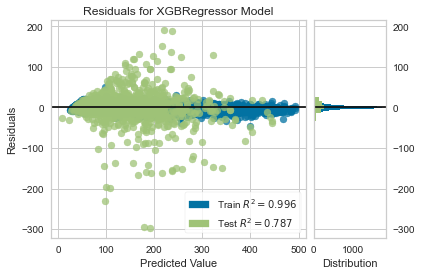

In [18]:
plot_model(tuned_xgb1)

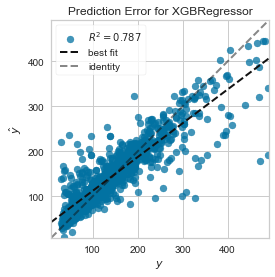

In [19]:
plot_model(tuned_xgb1, plot = 'error')

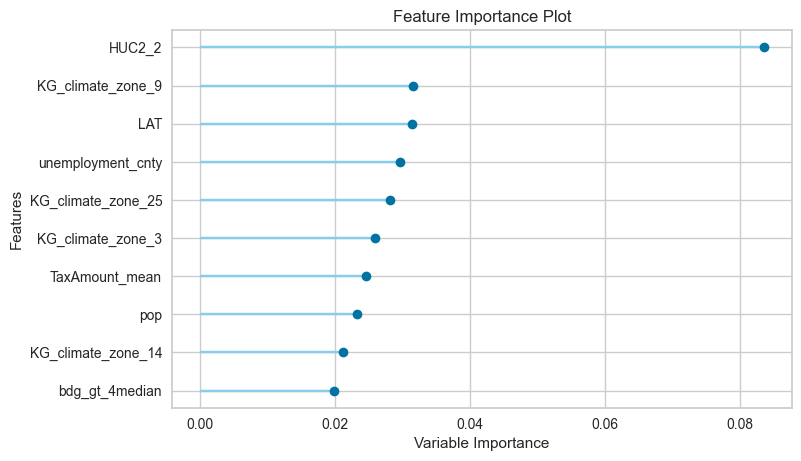

In [20]:
plot_model(tuned_xgb1, plot='feature')

In [21]:
predict_model(tuned_xgb1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,21.8337,1413.6760,37.5989,0.7875,0.2693,0.1932


,pop_density,gini,n_occupation,n_occ_management,n_occ_service,n_occ_sales_office,n_occ_farm_fish_forest,n_occ_const_maint_repair,n_occ_prod_trans_material,n_industry,...,KG_climate_zone_27,KG_climate_zone_3,KG_climate_zone_4,KG_climate_zone_5,KG_climate_zone_6,KG_climate_zone_7,KG_climate_zone_8,KG_climate_zone_9,pc,Label
0,1609889.750,0.380440,11915.513672,3666.447021,2169.980713,3232.446533,1002.338318,1844.301636,11915.513672,4.416047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.504768,91.001846
1,6915773.000,0.476870,41380.746094,19673.777344,6469.386719,10769.775391,2078.079834,2389.727783,41380.746094,130.878983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.113953,388.181030
2,1799197.750,0.400289,170425.046875,53144.953125,34162.890625,42148.054688,12148.739258,28820.402344,170425.046875,419.888672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.115967,95.021072
3,2203935.250,0.414000,5844.359375,1036.099731,1185.393677,1112.737305,431.957062,2078.171387,5844.359375,139.340988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.880615,166.010605
4,3479949.750,0.379833,48289.437500,17189.724609,8262.616211,13536.215820,4824.729492,4476.152344,48289.437500,86.995674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.183533,107.078400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2798298.750,0.365933,9866.776367,1673.479126,1624.425781,1453.684082,713.072449,2101.393311,8839.220703,29026.757812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.791763,149.804489
1196,3201200.750,0.453992,23061.912109,9428.216797,4682.310547,5134.615723,2258.610107,1558.160034,23061.912109,493.763214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.917313,104.195183
1197,1406346.375,0.490148,19385.857422,5468.358398,3695.996094,6515.306641,1960.762085,2534.913086,18030.892578,49267.382812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.505997,217.050842
1198,2908414.500,0.413850,519490.218750,194467.328125,89089.078125,140267.375000,33104.472656,62561.953125,519490.218750,1020.963135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.538456,50.103180


In [22]:
unseen_predictions = predict_model(tuned_xgb1, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,22.9878,1498.9907,38.7168,0.8042,0.2512,0.1797


,pop_density,gini,n_employed,n_occupation,n_occ_management,n_occ_service,n_occ_sales_office,n_occ_farm_fish_forest,n_occ_const_maint_repair,n_occ_prod_trans_material,...,prc_n_lt_ninth_gr,prc_n_ninth_to_twelth_gr,prc_n_hs_grad,prc_n_some_college,prc_n_associates,prc_n_bachelors,prc_n_masters_phd,pop,pc,Label
0,2.083790e+06,0.409000,66683.10125,44083.414080,13960.184920,9046.468556,10165.406160,5747.664044,5163.690408,44083.414080,...,7.926404,9.290616,31.107212,15.976079,5.264922,18.373522,12.061245,169586.0,37.454743,42.592823
1,3.290113e+06,0.514600,87146.54158,56574.364980,24815.140770,10619.315010,13184.913110,4800.080340,3154.915744,56574.364980,...,7.007812,5.007869,21.210732,13.972972,5.560708,25.842143,21.397763,288725.0,49.192484,87.349548
2,1.390469e+06,0.446000,16613.55050,9463.743946,2739.925868,1981.946376,2373.935770,945.974405,1421.961527,9463.743946,...,7.634275,10.409745,33.714009,18.784607,9.939092,13.856589,5.661683,20228.0,96.969547,153.690109
3,1.321725e+06,0.374000,34581.99953,21835.999710,7283.999894,4256.999936,5643.999931,1515.999982,3134.999967,21835.999710,...,5.591033,8.614382,32.767911,19.626821,9.841682,16.214328,7.343844,43713.0,111.090522,105.135078
4,2.991423e+06,0.409333,47085.33699,30782.845840,11621.330550,5469.118915,7959.225237,2638.070799,3095.100336,30782.845840,...,4.161232,7.530591,29.276965,19.473279,9.810903,20.744908,9.002121,121806.0,82.319426,96.193321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,8.996180e+05,0.419800,60966.12646,36932.598230,10913.637050,6473.799322,9511.895148,40.381779,3930.605991,6062.278945,...,6.318198,10.963337,29.419144,24.103774,7.330996,15.600898,6.263654,85839.0,152.318574,90.600426
1329,1.187313e+06,0.407267,66149.42402,39800.546750,11658.524670,7094.611760,10008.526870,4420.795903,6618.087540,39800.546750,...,6.602874,10.311936,29.845379,24.544454,7.606777,15.022667,6.065913,86578.0,53.821748,98.498985
1330,1.246467e+06,0.444667,17975.96031,9147.557886,1828.726808,1343.489105,2454.164760,1089.576020,1769.710037,9043.561753,...,2.654680,10.951200,38.997958,27.537536,4.595808,9.299383,5.963436,22751.0,281.505624,266.612244
1331,1.230890e+06,0.451900,17931.06155,9344.046554,2861.339609,1613.935360,1816.676003,1242.410636,1809.684946,9344.046554,...,4.445199,12.772311,35.100102,26.325076,3.644384,12.195453,5.517475,22375.0,246.559302,251.267746


In [23]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.pc, unseen_predictions.Label, 'R2')

0.8042